# Basic Preprocessing

In [15]:
import mne

In [16]:
raw = mne.io.read_raw_brainvision("../dataset_s/mdd/sub-88000489/ses-1/eeg/sub-88000489_ses-1_task-restEC_eeg.vhdr", preload=True)

Extracting parameters from ../dataset_s/mdd/sub-88000489/ses-1/eeg/sub-88000489_ses-1_task-restEC_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 60002  =      0.000 ...   120.004 secs...


In [17]:
non_eeg_channels = {
        'VPVA': 'eog',
        'VNVB': 'eog',
        'HPHL': 'eog',
        'HNHR': 'eog',
        'Erbs': 'ecg',
        'OrbOcc': 'emg',
    }
raw.set_channel_types(non_eeg_channels)

<RawBrainVision | sub-88000489_ses-1_task-restEC_eeg.eeg, 33 x 60003 (120.0 s), ~15.1 MiB, data loaded>

In [ ]:
raw.plot(show=True)

In [18]:
notch_freq=[50.0]

raw.notch_filter(freqs=notch_freq, picks='eeg')


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawBrainVision | sub-88000489_ses-1_task-restEC_eeg.eeg, 33 x 60003 (120.0 s), ~15.1 MiB, data loaded>

In [ ]:
raw.plot_psd(show=True)

In [ ]:
raw.plot(show=True)

In [19]:
l_freq=0.1
h_freq=40.0
raw.filter(l_freq=l_freq, h_freq=h_freq, picks='eeg')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<RawBrainVision | sub-88000489_ses-1_task-restEC_eeg.eeg, 33 x 60003 (120.0 s), ~15.1 MiB, data loaded>

In [ ]:
raw.plot(show=True)

In [20]:
raw.set_eeg_reference('average', projection=True)
raw = raw.apply_proj()

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


# Old ICA

In [13]:
# ICA for artifact removal
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
eog_indices, _ = ica.find_bads_eog(raw)
ica.exclude = eog_indices
raw = ica.apply(raw)

Fitting ICA to data using 27 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 20 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.8s.
Using EOG channels: VPVA, VNVB, HPHL, HNHR
    Applying projection operator with 1 vector (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

    Applying projection operator with 1 vector (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

    Applying projection operator with 1 vector (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


# New ICA

In [21]:
# Select only EEG channels
eeg_picks = mne.pick_types(raw.info, eeg=True, exclude='bads')

# Fit ICA only on EEG channels
ica.fit(raw, picks=eeg_picks)

# Find and exclude EOG artifacts
eog_indices, _ = ica.find_bads_eog(raw)
ica.exclude = eog_indices

# Apply ICA to the EEG channels only
raw = ica.apply(raw)


Fitting ICA to data using 27 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 20 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.8s.
Using EOG channels: VPVA, VNVB, HPHL, HNHR
    Applying projection operator with 1 vector (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

    Applying projection operator with 1 vector (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

    Applying projection operator with 1 vector (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 27 PCA components


In [ ]:
raw.plot(show=True)

In [ ]:
import mne
def preprocess_eeg_data(vhdr_file_path, l_freq=0.1, h_freq=40.0, notch_freq=50):
    """Preprocess EEG data."""
    raw = mne.io.read_raw_brainvision(vhdr_file_path, preload=True)
    
    # Set EOG channels
    # eog_channels = ['VPVA', 'VNVB', 'HPHL', 'HNHR']
    # Define non-EEG channel types
    non_eeg_channels = {
        'VPVA': 'eog',
        'VNVB': 'eog',
        'HPHL': 'eog',
        'HNHR': 'eog',
        'Erbs': 'ecg',
        'OrbOcc': 'emg',
    }
    raw.set_channel_types(non_eeg_channels)
    # Apply notch filter and bandpass filter
    raw.notch_filter(freqs=[notch_freq], picks='eeg')
    raw.filter(l_freq=l_freq, h_freq=h_freq, picks='eeg')
    
    # Set EEG reference to average
    # raw.set_eeg_reference('average', projection=True)
    
    # ICA for artifact removal
    ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
    ica.fit(raw)
    eog_indices, _ = ica.find_bads_eog(raw)
    ica.exclude = eog_indices
    raw = ica.apply(raw)
    
    # Drop specific channels after ICA
    # channels_to_drop = ['Erbs', 'OrbOcc', 'Mass']
    # raw.drop_channels([ch for ch in channels_to_drop if ch in raw.ch_names])
    
    return raw


In [ ]:
raw = preprocess_eeg_data("../dataset_s/mdd/sub-88000489/ses-1/eeg/sub-88000489_ses-1_task-restEC_eeg.vhdr")

In [ ]:
raw.plot(show=True)

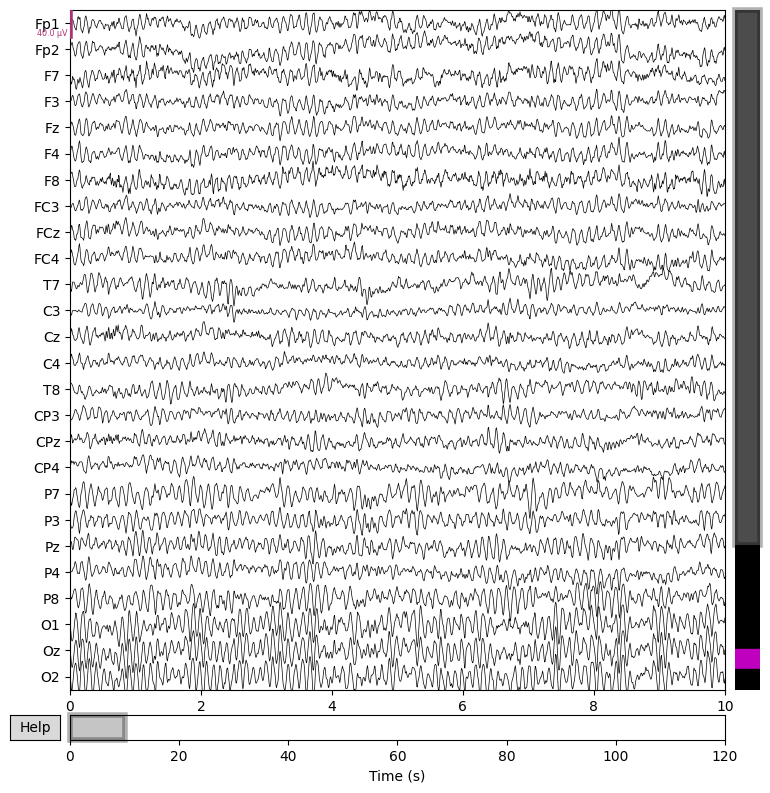

In [36]:
raw.plot(n_channels=26).savefig('plts/with_new_ica_all_channels.png')